In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Auto_Insurance_Fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Checking the shape of the data
df.shape

(1000, 40)

In [5]:
# Checking the no. of columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Checking the missing values

In [6]:
df.isnull().values.any()

True

In [7]:
#Checking the no. of missing values in the columns.
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df=df.drop(columns=['_c39'],axis=1)
df.shape

(1000, 39)

In [9]:
# Again checking for missing values
df.isnull().values.any()

False

In [11]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation: Information of the dataset shows that there are no null values. But, '?' is present in the dataset. Hence, I shall encode '?' as NaN value and again check the null values.

In [12]:
# Replacing the question mark with NaN value.
df=df.replace('?',np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [13]:
# Checking for null values again.
df.isnull().values.any()

True

In [14]:
# Checking again the no. of null values in columns.
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

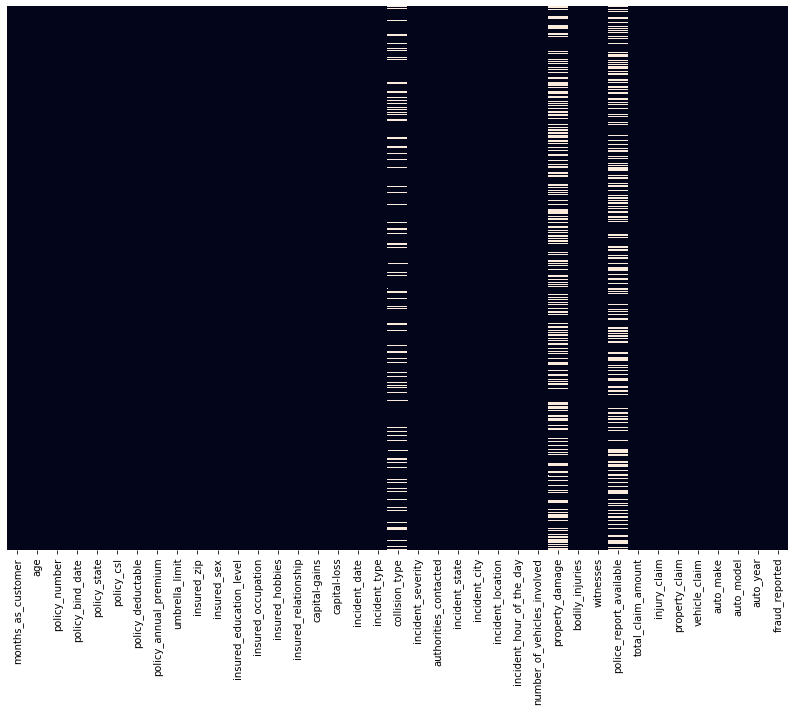

In [16]:
# Seeing the null values with the help of heatmap.
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [18]:
# Imputing the missing value with mode
for col in ['collision_type', 'property_damage', 'police_report_available']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [19]:
# Now again checking for missing values.
df.isnull().values.any()

False

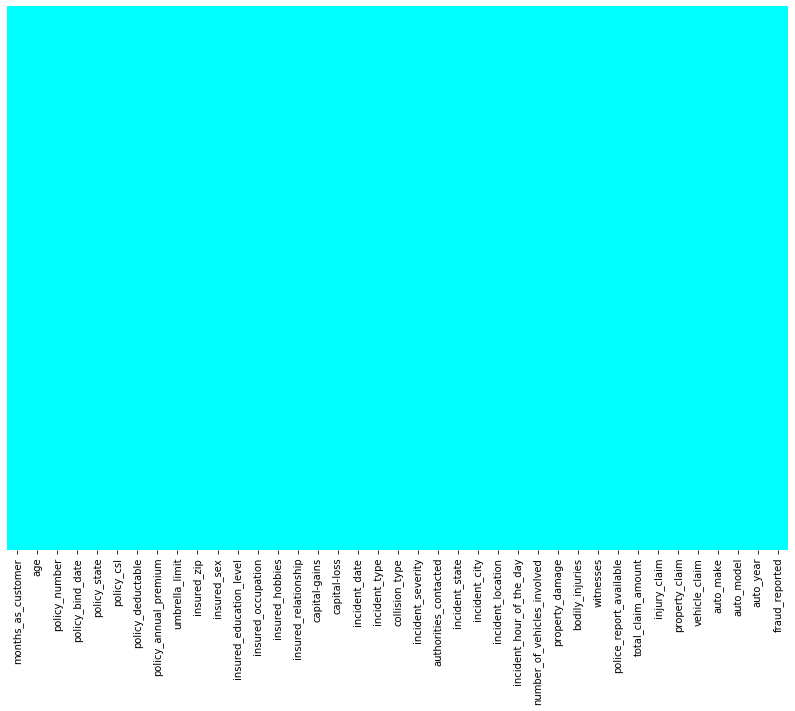

In [20]:
# Visualizing null values, if any,
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

# Exploring the categorical columns.

In [21]:
# Printing the object data type columns and their unique values

for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+' : '+str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************')
        print('\n')

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
*******************************************************************************


authorities_contacted : ['Police' 'None' 'Fire' 'Other' 'Ambulance']
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
*******************************************************************************


incident_state : ['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
*******************************************************************************


incident_city : ['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale' 'Northbend'
 'Northbrook']
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
*

# For analyzing the data with target i.e. fraud_reported we have to change income into numerice datatype.

In [22]:
# Changing the data type of target column.
df['fraud_reported']=df['fraud_reported'].map({'N':0,'Y':1})
df['fraud_reported'].dtypes

dtype('int64')

In [23]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Observation: Out of 1000 reports 247 are reported as fraud.

# Summary Statistics

In [24]:
# Checking the summary of the dataset.
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Observations:
1.  Max. month as a customer is 479.
2. Max. age is 64 and min. is 19 years old.
3. Max. vehicles involved in accidents is 4 and min. is 1.
4. Max. two person get affected in accident.
5. Automobiles meet with an accident is manufactured in between year 1995 and 2015.
6. In months_as_cutomer, policy_number, policy_deductable, umbrella_limit, insured_zip, capital_gain, capital_loss, injury_claim, property_claim, are right skewed data because mean is greater than median in these columns.
7. In total_claim_amount, vehicle_claim are left-skewed data because median is greater than mean.
8. The diff. between 75%ile and max. is higher in months_as_customer, policy_annual_premium, umbrella_limit,capital_gain, total_claim_amount, property_claim, vehicle_claim columns. So, outliers are present in these columns, which needs to be removed. 

# Checking correlation

In [25]:
df_cor=df.corr()
df_cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


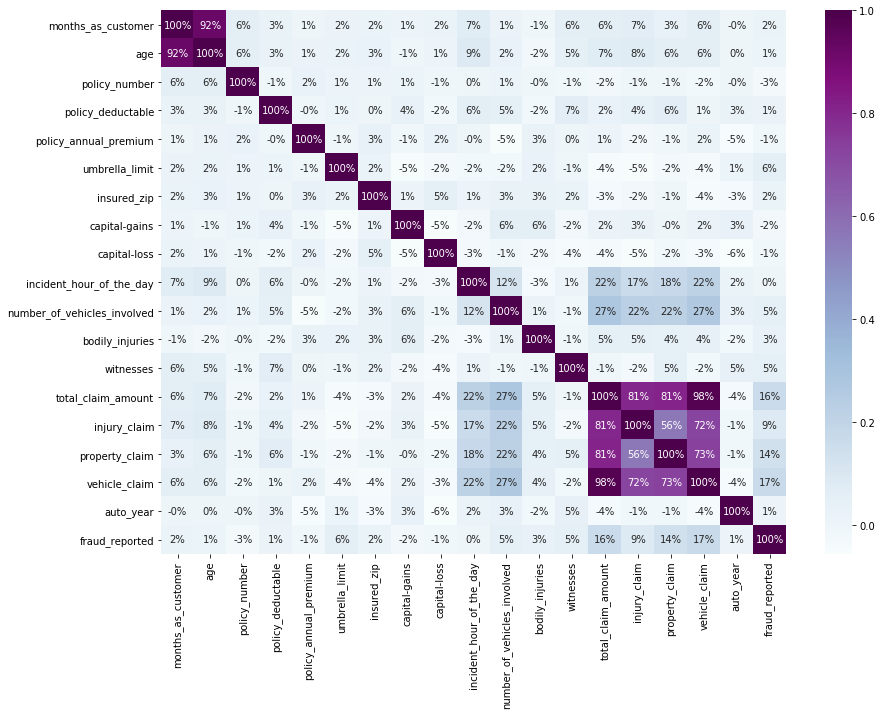

In [31]:
# To check correlation via heatmap.
plt.figure(figsize=(14,10))
sns.heatmap(df_cor,annot=True, fmt='.0%',cmap='BuPu')
plt.show()

Observations:
1. total_claim_amount, injury_claim, property_claim, vehicle_claim columns are highly correlated with each other.
2. months_as_cutomer and age is correlated with each other. So, as a age of person increases, the no. of months as customer also increases.

# Correlation with target column i.e. fraud reported.

Text(0.5, 1.0, 'Correlation with target variable')

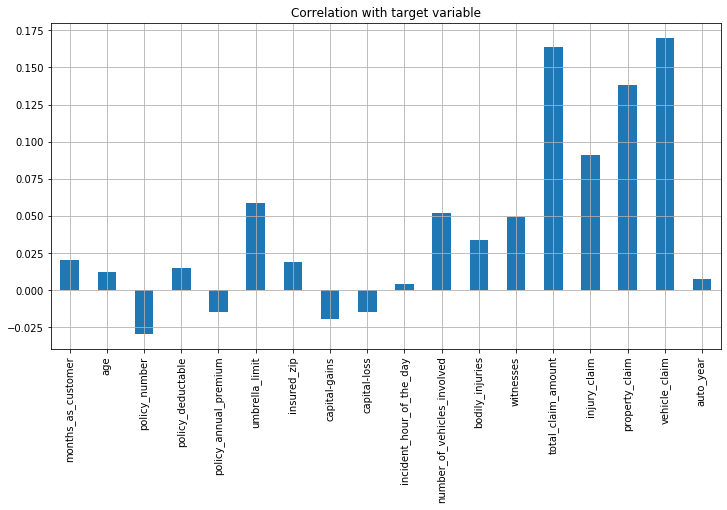

In [37]:
# Correlation with target column
plt.figure(figsize=(12,6))
df.drop('fraud_reported', axis=1).corrwith(df['fraud_reported']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with target variable')

# Data Visualization

# Univariate Analysis

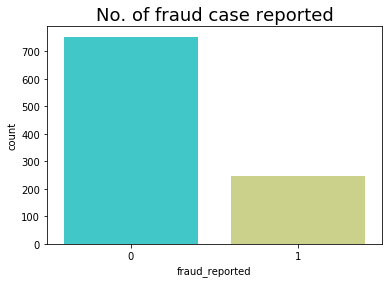

0    753
1    247
Name: fraud_reported, dtype: int64


In [38]:
# Checking the no. of fraud cases.
sns.countplot(x='fraud_reported',data=df,palette='rainbow')
plt.title('No. of fraud case reported',fontsize=18)
plt.show()

print(df['fraud_reported'].value_counts())

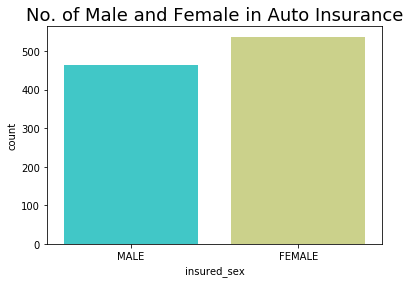

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [40]:
# Checking the no. of Male and Female who took insurance.
sns.countplot(x='insured_sex',data=df,palette='rainbow')
plt.title('No. of Male and Female in Auto Insurance',fontsize=18)
plt.show()

print(df['insured_sex'].value_counts())

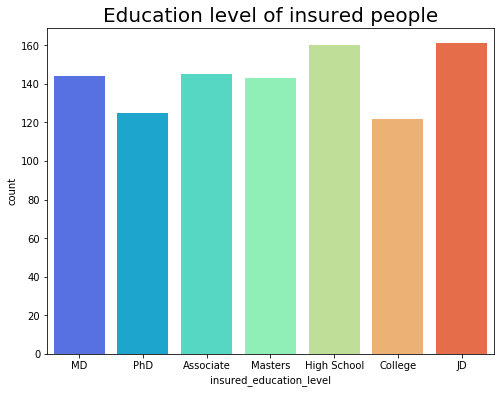

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [41]:
# Checking the education level of insured people.
plt.figure(figsize=(8,6))
sns.countplot(x='insured_education_level',data=df,palette='rainbow')
plt.title('Education level of insured people',fontsize=20)
plt.show()

print(df['insured_education_level'].value_counts())

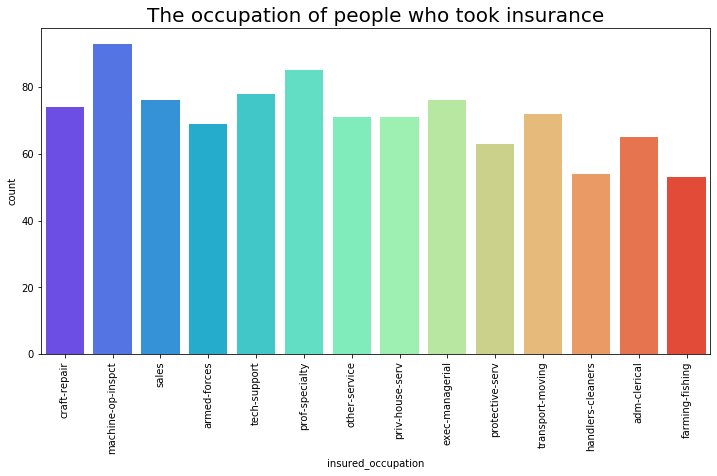

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [42]:
# Checking the occupation of the people who took insurance.
plt.figure(figsize=(12,6))
sns.countplot(x='insured_occupation',data=df,palette='rainbow')
plt.title('The occupation of people who took insurance',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_occupation'].value_counts())

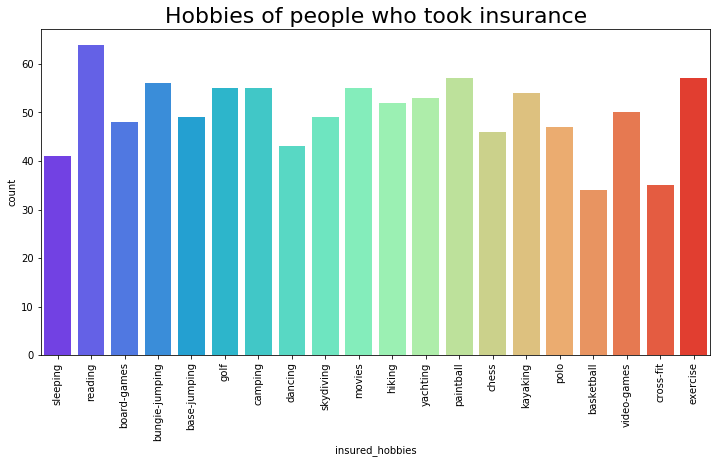

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [43]:
# Checking the hobbies of the people who took insurance.
plt.figure(figsize=(12,6))
sns.countplot(x='insured_hobbies',data=df,palette='rainbow')
plt.title('Hobbies of people who took insurance',fontsize=22)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_hobbies'].value_counts())

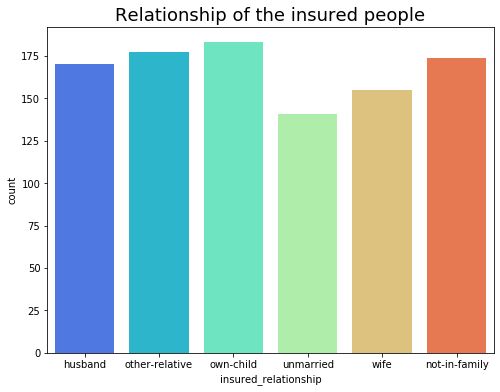

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [44]:
# Checking the relationship.
plt.figure(figsize=(8,6))
sns.countplot(x='insured_relationship',data=df,palette='rainbow')
plt.title('Relationship of the insured people',fontsize=18)
plt.show()

print(df['insured_relationship'].value_counts())

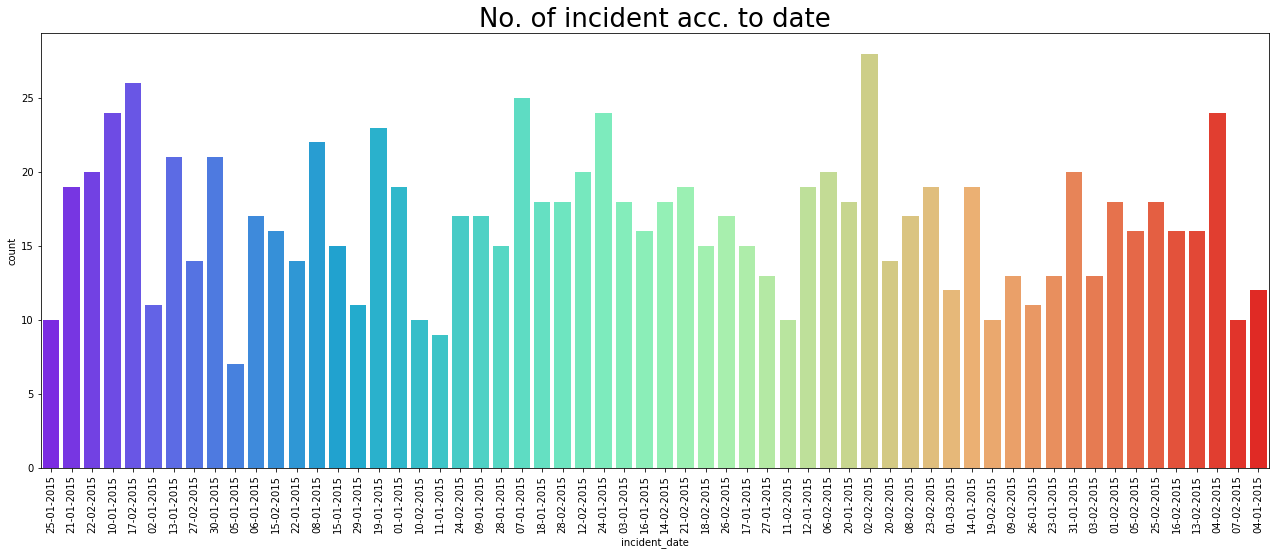

In [45]:
# Checking the incident date.
plt.figure(figsize=(22,8))
sns.countplot(x='incident_date',data=df,palette='rainbow')
plt.title('No. of incident acc. to date',fontsize=26)
plt.xticks(rotation='vertical')
plt.show()

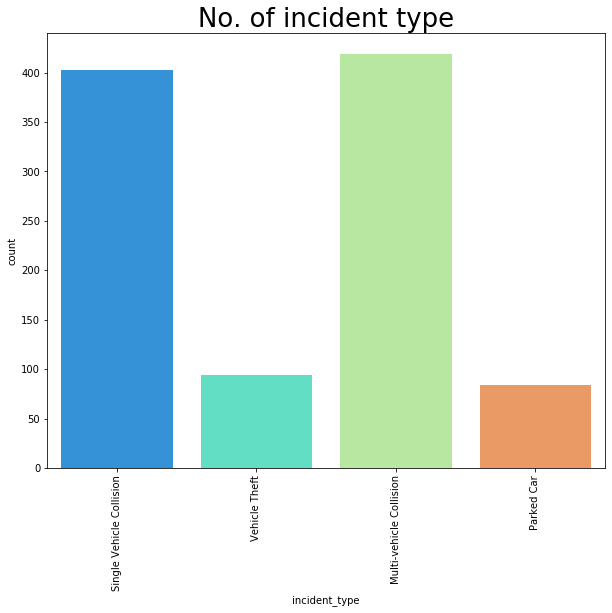

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [47]:
# Checking the incident date.
plt.figure(figsize=(10,8))
sns.countplot(x='incident_type',data=df,palette='rainbow')
plt.title('No. of incident type',fontsize=26)
plt.xticks(rotation='vertical')
plt.show()

print(df['incident_type'].value_counts())

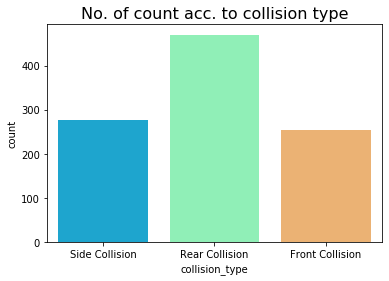

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [48]:
# Checking the no. of collision type.
sns.countplot(x='collision_type',data=df,palette='rainbow')
plt.title('No. of count acc. to collision type',fontsize=16)
plt.show()

print(df['collision_type'].value_counts())

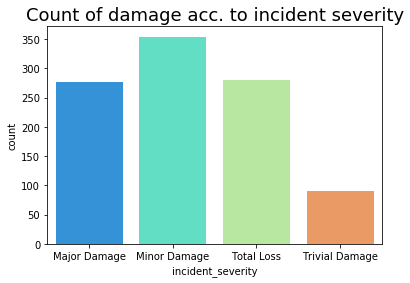

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


In [49]:
# Checking incident severity
sns.countplot(x='incident_severity',data=df,palette='rainbow')
plt.title('Count of damage acc. to incident severity',fontsize=18)
plt.show()

print(df['incident_severity'].value_counts())

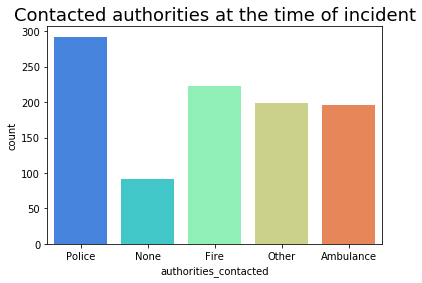

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [50]:
# Checking the authorities contacted at the time of incident.
sns.countplot(x='authorities_contacted',data=df,palette='rainbow')
plt.title('Contacted authorities at the time of incident',fontsize=18)
plt.show()

print(df['authorities_contacted'].value_counts())

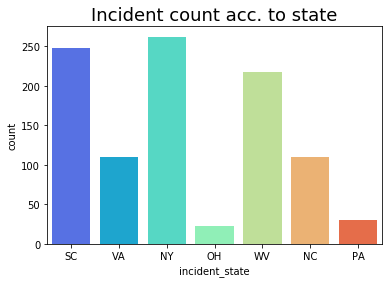

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [51]:
#Checking the no. of incident acc. to state.
sns.countplot(x='incident_state',data=df,palette='rainbow')
plt.title('Incident count acc. to state',fontsize=18)
plt.show()

print(df['incident_state'].value_counts())

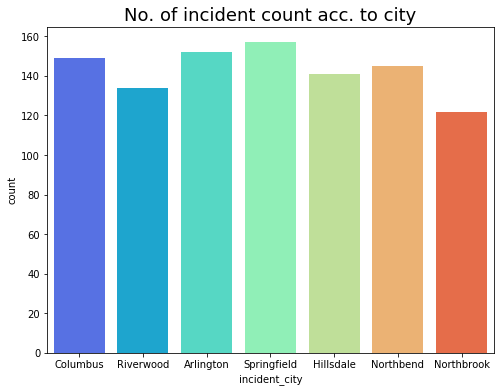

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [52]:
# Checking the no. of fraud cases.
plt.figure(figsize=(8,6))
sns.countplot(x='incident_city',data=df,palette='rainbow')
plt.title('No. of incident count acc. to city',fontsize=18)
plt.show()

print(df['incident_city'].value_counts())

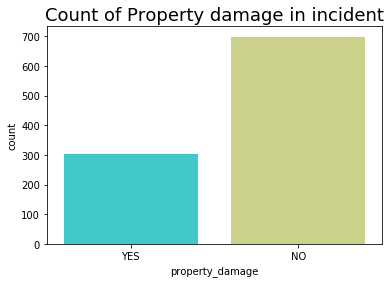

NO     698
YES    302
Name: property_damage, dtype: int64


In [53]:
# Checking the no. of times property damage happened during an incident.
sns.countplot(x='property_damage',data=df,palette='rainbow')
plt.title('Count of Property damage in incident',fontsize=18)
plt.show()

print(df['property_damage'].value_counts())

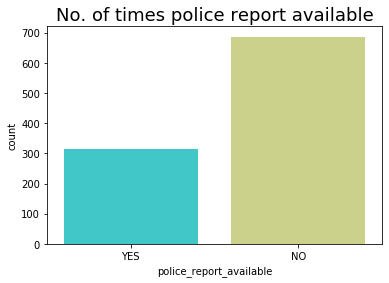

NO     686
YES    314
Name: police_report_available, dtype: int64


In [54]:
# Checking the no. of times police report available
sns.countplot(x='police_report_available',data=df,palette='rainbow')
plt.title('No. of times police report available',fontsize=18)
plt.show()

print(df['police_report_available'].value_counts())

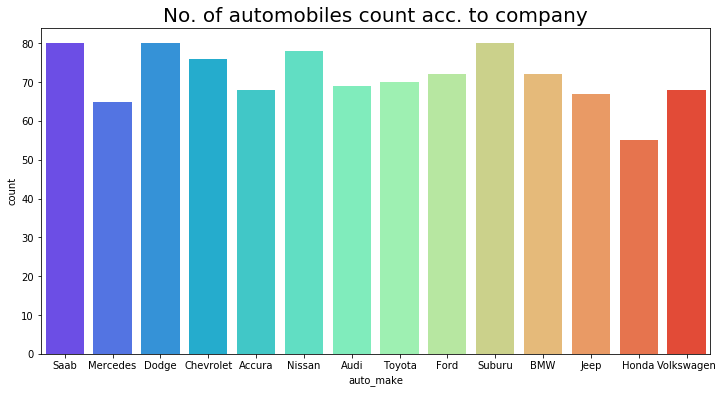

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


In [55]:
# Checking the no. of automobiles company.
plt.figure(figsize=(12,6))
sns.countplot(x='auto_make',data=df,palette='rainbow')
plt.title('No. of automobiles count acc. to company',fontsize=20)
plt.show()

print(df['auto_make'].value_counts())

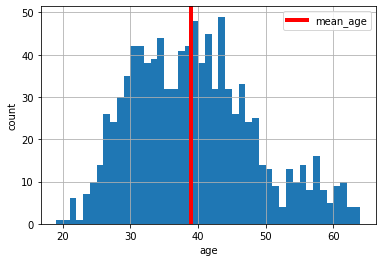

In [56]:
# Checking the mean of age group of people who took insurance.

ages=df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val=np.mean(df['age'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean_age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

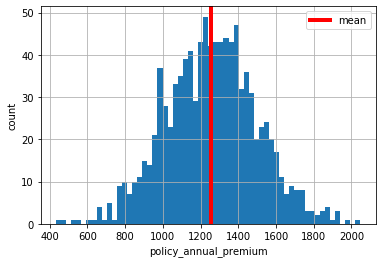

In [57]:
# Checking the mean of policy annual premium.

policy_annual_premium=df['policy_annual_premium'].hist(bins=60)
mean_val=np.mean(df['policy_annual_premium'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean')
plt.xlabel('policy_annual_premium')
plt.ylabel('count')
plt.legend()
plt.show()

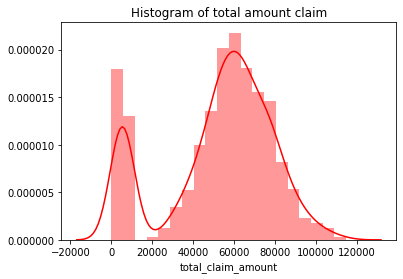

In [58]:
# Histogram of total amount claim
sns.distplot(df['total_claim_amount'],color='r')
plt.title('Histogram of total amount claim')
plt.show()

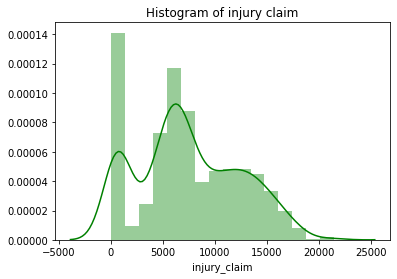

In [59]:
# Histogram of total injury claim
sns.distplot(df['injury_claim'],color='g')
plt.title('Histogram of injury claim')
plt.show()

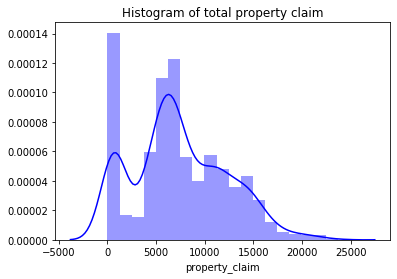

In [60]:
# Histogram of property claim
sns.distplot(df['property_claim'],color='b')
plt.title('Histogram of total property claim')
plt.show()

From the above two graph, it is clearly shown that property claim and injury claim are right-skewed.

# Bivariate Analysis

Our feature variable of interest is fraud_reported.

It refers to the fraud cases.

We already changed it into integer valued as it contains only two number 0 and 1.

1 stands for yes Fraud.

0 stands for no Fraud.

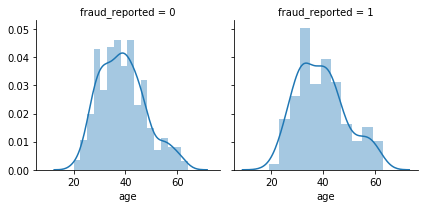

In [61]:
# Exploring age vs income via facegrid.
facet=sns.FacetGrid(df,col='fraud_reported')
facet.map(sns.distplot,'age')
plt.show()

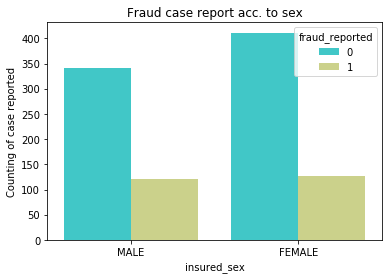

insured_sex  fraud_reported
FEMALE       0                 411
             1                 126
MALE         0                 342
             1                 121
Name: fraud_reported, dtype: int64


In [62]:
# Insured sex vs fraud case reported
sns.countplot(x='insured_sex',hue='fraud_reported',data=df,palette='rainbow')
plt.title('Fraud case report acc. to sex')
plt.ylabel('Counting of case reported')
plt.show()

print(df.groupby('insured_sex')['fraud_reported'].value_counts())

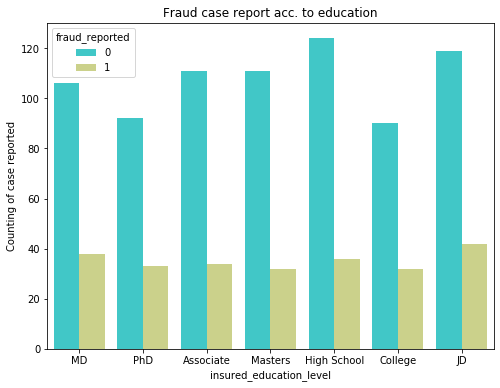

insured_education_level  fraud_reported
Associate                0                 111
                         1                  34
College                  0                  90
                         1                  32
High School              0                 124
                         1                  36
JD                       0                 119
                         1                  42
MD                       0                 106
                         1                  38
Masters                  0                 111
                         1                  32
PhD                      0                  92
                         1                  33
Name: fraud_reported, dtype: int64


In [63]:
# Insured sex vs fraud case reported
plt.figure(figsize=(8,6))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df,palette='rainbow')
plt.title('Fraud case report acc. to education')
plt.ylabel('Counting of case reported')
plt.show()

print(df.groupby('insured_education_level')['fraud_reported'].value_counts())

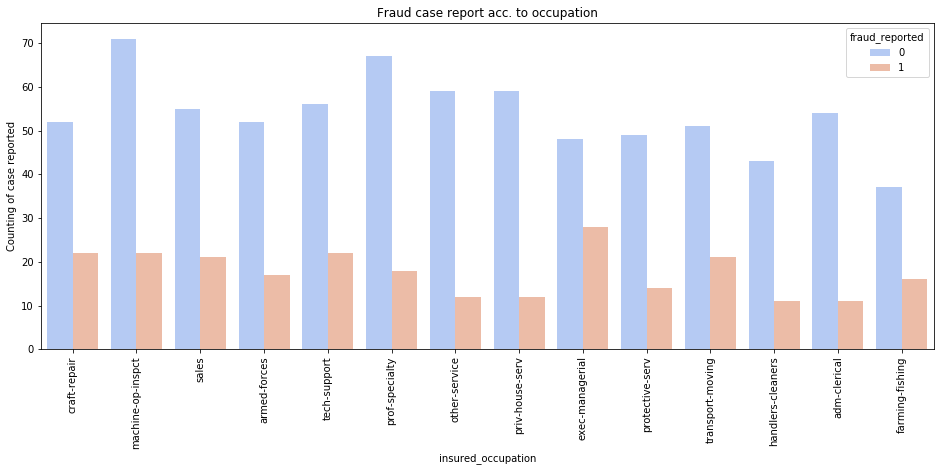

insured_occupation  fraud_reported
adm-clerical        0                 54
                    1                 11
armed-forces        0                 52
                    1                 17
craft-repair        0                 52
                    1                 22
exec-managerial     0                 48
                    1                 28
farming-fishing     0                 37
                    1                 16
handlers-cleaners   0                 43
                    1                 11
machine-op-inspct   0                 71
                    1                 22
other-service       0                 59
                    1                 12
priv-house-serv     0                 59
                    1                 12
prof-specialty      0                 67
                    1                 18
protective-serv     0                 49
                    1                 14
sales               0                 55
                    1 

In [65]:
# Insured occupation vs fraud case reported
plt.figure(figsize=(16,6))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df,palette='coolwarm')
plt.title('Fraud case report acc. to occupation')
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_occupation')['fraud_reported'].value_counts())

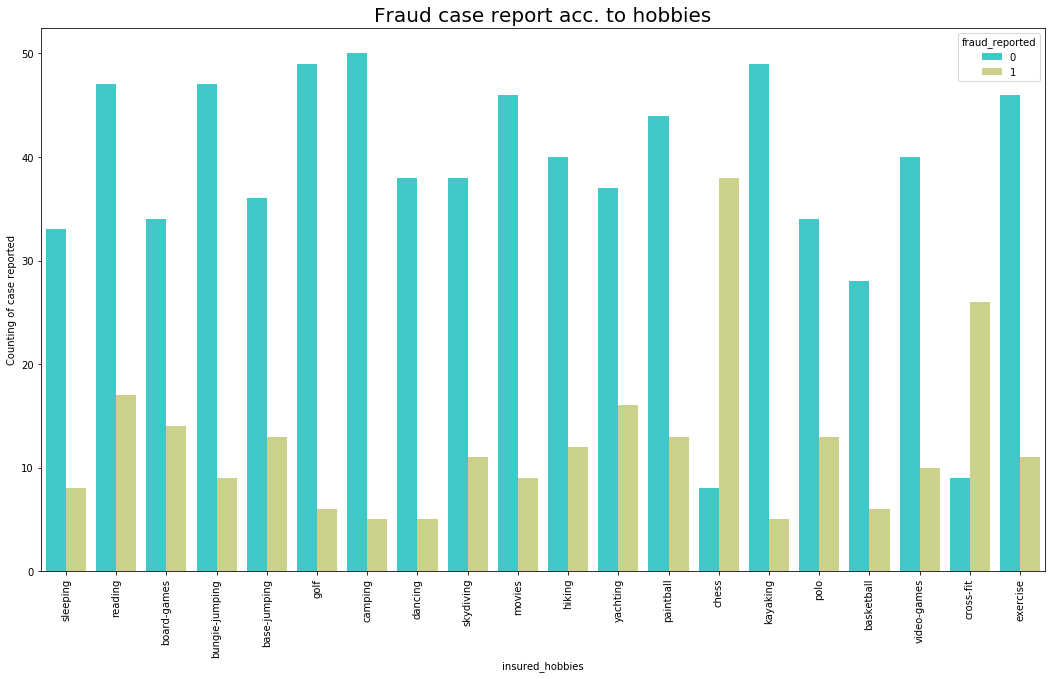

insured_hobbies  fraud_reported
base-jumping     0                 36
                 1                 13
basketball       0                 28
                 1                  6
board-games      0                 34
                 1                 14
bungie-jumping   0                 47
                 1                  9
camping          0                 50
                 1                  5
chess            1                 38
                 0                  8
cross-fit        1                 26
                 0                  9
dancing          0                 38
                 1                  5
exercise         0                 46
                 1                 11
golf             0                 49
                 1                  6
hiking           0                 40
                 1                 12
kayaking         0                 49
                 1                  5
movies           0                 46
                 1

In [70]:
# Hobbies vs fraud case reported
plt.figure(figsize=(18,10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df,palette='rainbow')
plt.title('Fraud case report acc. to hobbies', fontsize=20)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_hobbies')['fraud_reported'].value_counts())

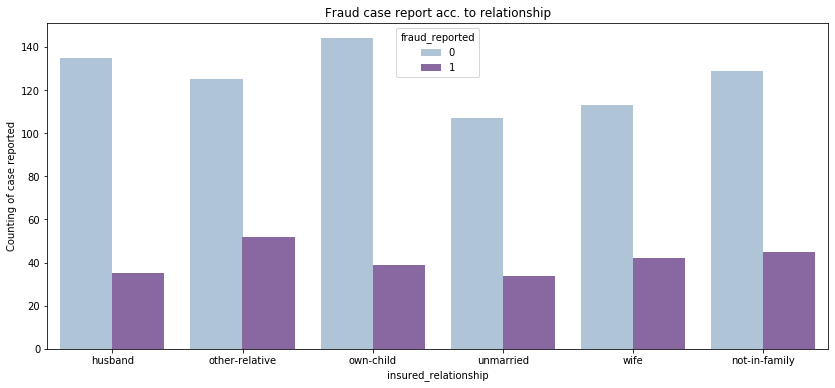

insured_relationship  fraud_reported
husband               0                 135
                      1                  35
not-in-family         0                 129
                      1                  45
other-relative        0                 125
                      1                  52
own-child             0                 144
                      1                  39
unmarried             0                 107
                      1                  34
wife                  0                 113
                      1                  42
Name: fraud_reported, dtype: int64


In [71]:
# Insured relationship vs fraud case reported
plt.figure(figsize=(14,6))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df,palette='BuPu')
plt.title('Fraud case report acc. to relationship')
plt.ylabel('Counting of case reported')
plt.show()

print(df.groupby('insured_relationship')['fraud_reported'].value_counts())

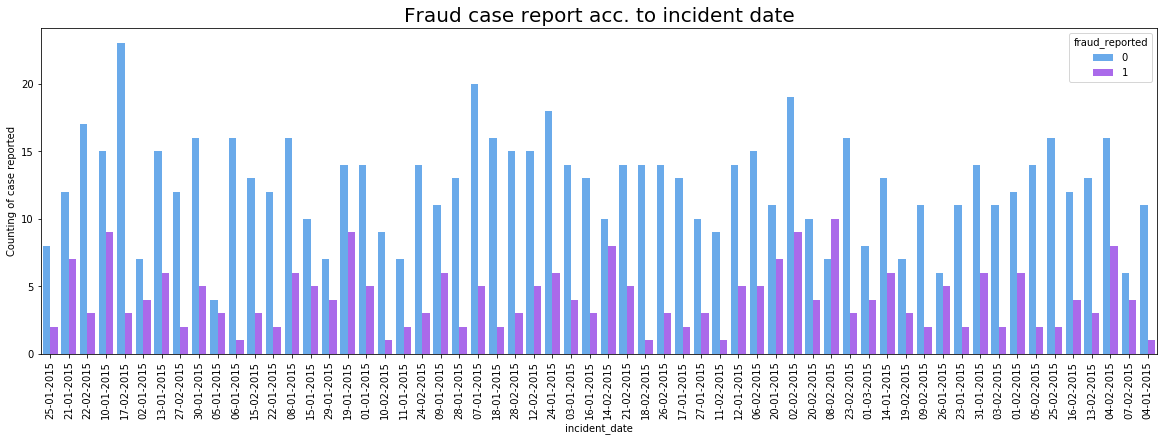

incident_date  fraud_reported
01-01-2015     0                 14
               1                  5
01-02-2015     0                 12
               1                  6
01-03-2015     0                  8
                                 ..
29-01-2015     1                  4
30-01-2015     0                 16
               1                  5
31-01-2015     0                 14
               1                  6
Name: fraud_reported, Length: 120, dtype: int64


In [73]:
# Incident date vs fraud case reported
plt.figure(figsize=(20,6))
sns.countplot(x='incident_date',hue='fraud_reported',data=df,palette='cool')
plt.title('Fraud case report acc. to incident date', fontsize=20)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_date')['fraud_reported'].value_counts())

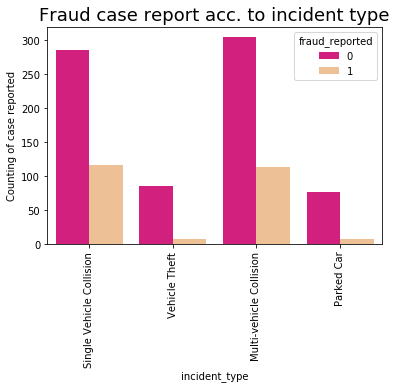

incident_type             fraud_reported
Multi-vehicle Collision   0                 305
                          1                 114
Parked Car                0                  76
                          1                   8
Single Vehicle Collision  0                 286
                          1                 117
Vehicle Theft             0                  86
                          1                   8
Name: fraud_reported, dtype: int64


In [74]:
# Incident type vs fraud case reported
sns.countplot(x='incident_type',hue='fraud_reported',data=df,palette='Accent_r')
plt.title('Fraud case report acc. to incident type', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_type')['fraud_reported'].value_counts())

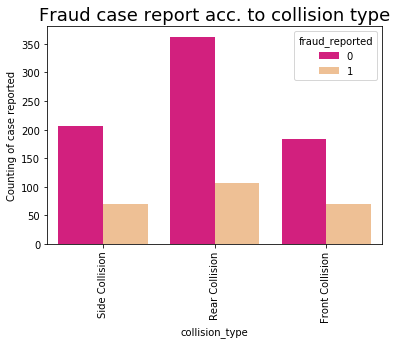

collision_type   fraud_reported
Front Collision  0                 184
                 1                  70
Rear Collision   0                 363
                 1                 107
Side Collision   0                 206
                 1                  70
Name: fraud_reported, dtype: int64


In [75]:
# collision type vs fraud case reported
sns.countplot(x='collision_type',hue='fraud_reported',data=df,palette='Accent_r')
plt.title('Fraud case report acc. to collision type', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('collision_type')['fraud_reported'].value_counts())

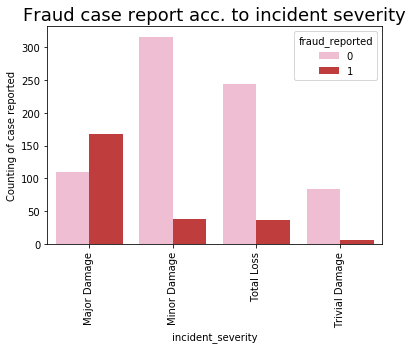

incident_severity  fraud_reported
Major Damage       1                 167
                   0                 109
Minor Damage       0                 316
                   1                  38
Total Loss         0                 244
                   1                  36
Trivial Damage     0                  84
                   1                   6
Name: fraud_reported, dtype: int64


In [77]:
# Incident severity vs fraud case reported
sns.countplot(x='incident_severity',hue='fraud_reported',data=df,palette='tab20_r')
plt.title('Fraud case report acc. to incident severity', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_severity')['fraud_reported'].value_counts())

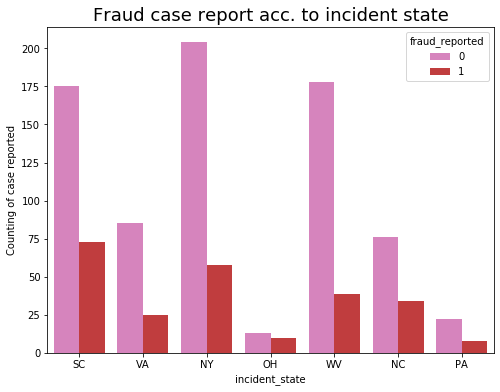

incident_state  fraud_reported
NC              0                  76
                1                  34
NY              0                 204
                1                  58
OH              0                  13
                1                  10
PA              0                  22
                1                   8
SC              0                 175
                1                  73
VA              0                  85
                1                  25
WV              0                 178
                1                  39
Name: fraud_reported, dtype: int64


In [78]:
# Incident state vs fraud case reported
plt.subplots(figsize=(8,6))
sns.countplot(x='incident_state',hue='fraud_reported',data=df,palette='tab10_r')
plt.title('Fraud case report acc. to incident state', fontsize=18)
plt.ylabel('Counting of case reported')
plt.show()

print(df.groupby('incident_state')['fraud_reported'].value_counts())

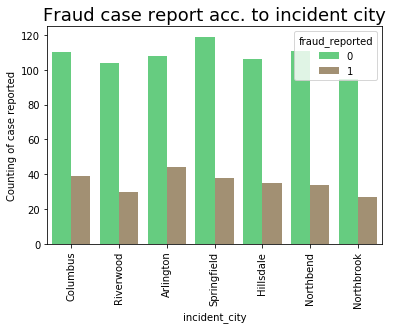

incident_city  fraud_reported
Arlington      0                 108
               1                  44
Columbus       0                 110
               1                  39
Hillsdale      0                 106
               1                  35
Northbend      0                 111
               1                  34
Northbrook     0                  95
               1                  27
Riverwood      0                 104
               1                  30
Springfield    0                 119
               1                  38
Name: fraud_reported, dtype: int64


In [79]:
# Incident city vs fraud case reported
sns.countplot(x='incident_city',hue='fraud_reported',data=df,palette='terrain')
plt.title('Fraud case report acc. to incident city', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_city')['fraud_reported'].value_counts())

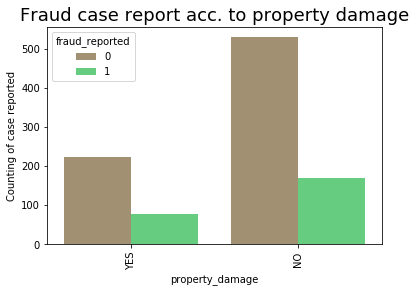

property_damage  fraud_reported
NO               0                 529
                 1                 169
YES              0                 224
                 1                  78
Name: fraud_reported, dtype: int64


In [80]:
# Property Damage vs fraud case reported
sns.countplot(x='property_damage',hue='fraud_reported',data=df,palette='terrain_r')
plt.title('Fraud case report acc. to property damage', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('property_damage')['fraud_reported'].value_counts())

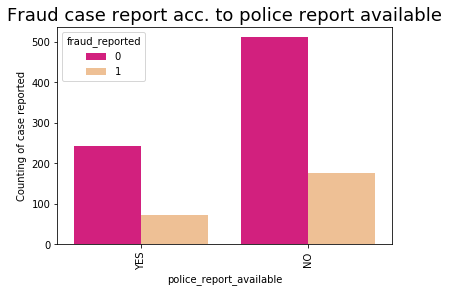

police_report_available  fraud_reported
NO                       0                 511
                         1                 175
YES                      0                 242
                         1                  72
Name: fraud_reported, dtype: int64


In [81]:
# Police report available vs fraud case reported
sns.countplot(x='police_report_available',hue='fraud_reported',data=df,palette='Accent_r')
plt.title('Fraud case report acc. to police report available', fontsize=18)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('police_report_available')['fraud_reported'].value_counts())

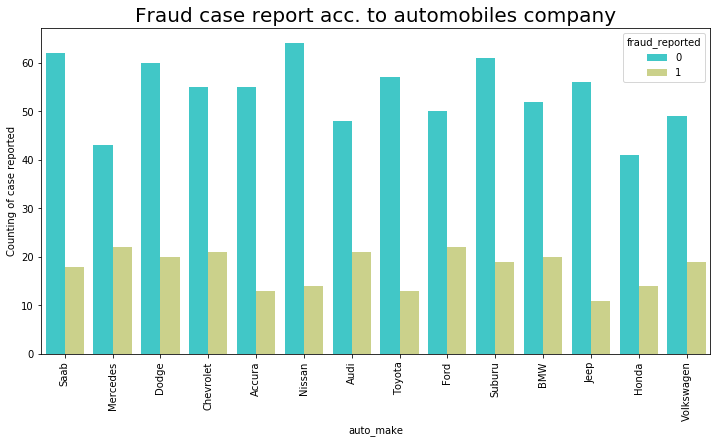

auto_make   fraud_reported
Accura      0                 55
            1                 13
Audi        0                 48
            1                 21
BMW         0                 52
            1                 20
Chevrolet   0                 55
            1                 21
Dodge       0                 60
            1                 20
Ford        0                 50
            1                 22
Honda       0                 41
            1                 14
Jeep        0                 56
            1                 11
Mercedes    0                 43
            1                 22
Nissan      0                 64
            1                 14
Saab        0                 62
            1                 18
Suburu      0                 61
            1                 19
Toyota      0                 57
            1                 13
Volkswagen  0                 49
            1                 19
Name: fraud_reported, dtype: int64


In [83]:
# Automobiles company vs fraud case reported
plt.figure(figsize=(12,6))
sns.countplot(x='auto_make',hue='fraud_reported',data=df,palette='rainbow')
plt.title('Fraud case report acc. to automobiles company', fontsize=20)
plt.ylabel('Counting of case reported')
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('auto_make')['fraud_reported'].value_counts())

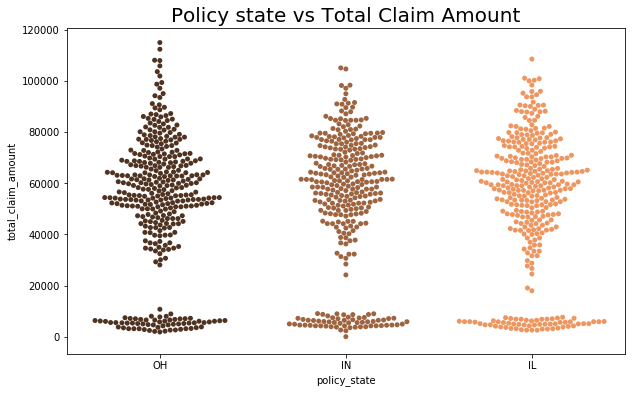

In [88]:
# Policy State vs Claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['policy_state'],df['total_claim_amount'], palette='copper')
plt.title('Policy state vs Total Claim Amount', fontsize=20)
plt.show()

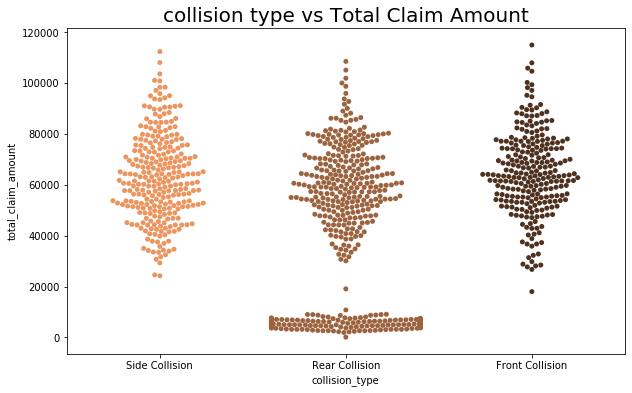

In [89]:
# Collision Type vs Claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['collision_type'],df['total_claim_amount'], palette='copper_r')
plt.title('collision type vs Total Claim Amount', fontsize=20)
plt.show()

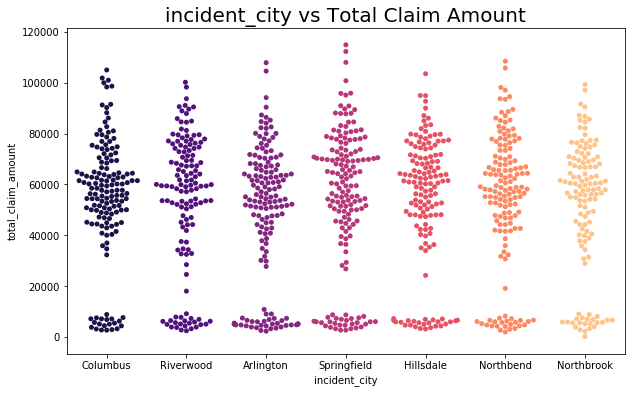

In [90]:
# Incident city vs claim amount
plt.figure(figsize=(10,6))
sns.swarmplot(df['incident_city'],df['total_claim_amount'], palette='magma')
plt.title('incident_city vs Total Claim Amount', fontsize=20)
plt.show()

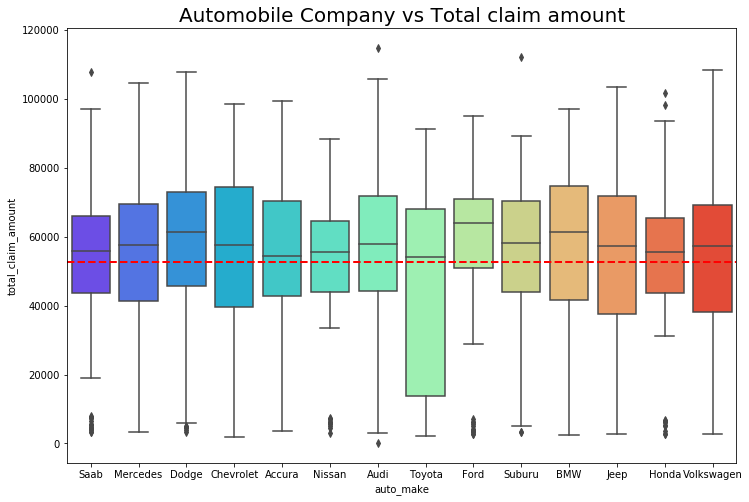

In [91]:
# Total amount claim vs Automobile company
plt.figure(figsize=(12,8))
mean_amount=np.mean(df['total_claim_amount'])
sns.boxplot(y='total_claim_amount',x='auto_make',data=df,palette='rainbow')
plt.axhline(mean_amount,color='r',linestyle='dashed',linewidth=2)
plt.title('Automobile Company vs Total claim amount',fontsize=20)
plt.show()

Observation: From the above graph it is clearly shown that mean of total claim amount is nearly same for every automobile company. There are some above and low claim amount present in Honda, Ford, Audi, and Saab, which may be outliers. 

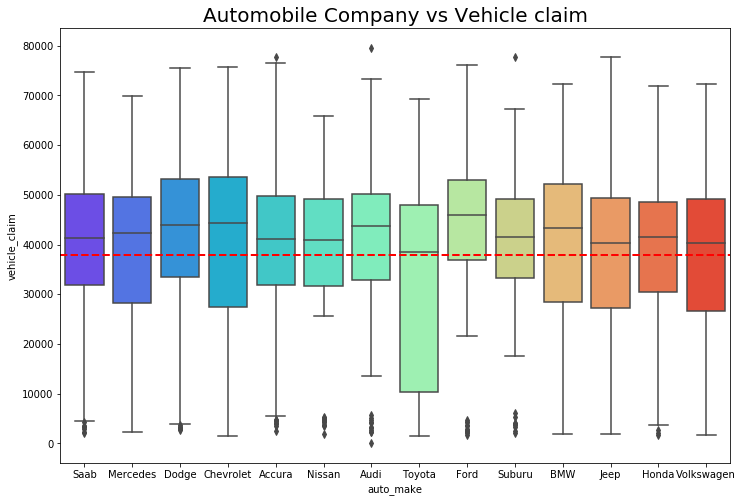

In [92]:
# Vehicle claim vs Automobile company
plt.figure(figsize=(12,8))
mean_amount=np.mean(df['vehicle_claim'])
sns.boxplot(y='vehicle_claim',x='auto_make',data=df,palette='rainbow')
plt.axhline(mean_amount,color='r',linestyle='dashed',linewidth=2)
plt.title('Automobile Company vs Vehicle claim',fontsize=20)
plt.show()

# Multivariate Analysis

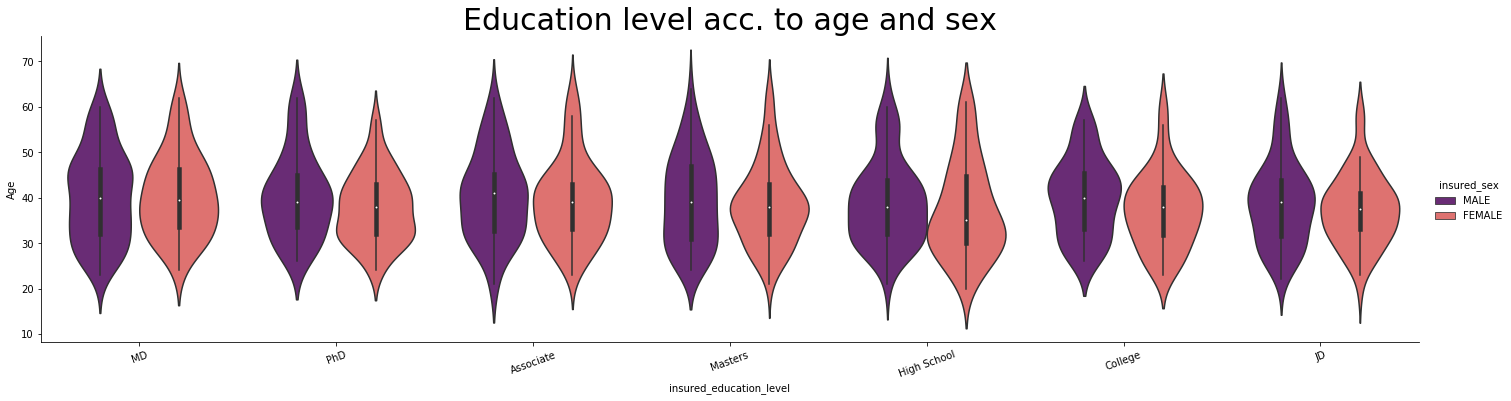

In [93]:
sns.factorplot(x='insured_education_level',y='age',hue='insured_sex',data=df,kind='violin',size=5,palette='magma',aspect=4)
plt.title('Education level acc. to age and sex',fontsize=30)
plt.xticks(rotation=20)
plt.ylabel('Age')
plt.show()

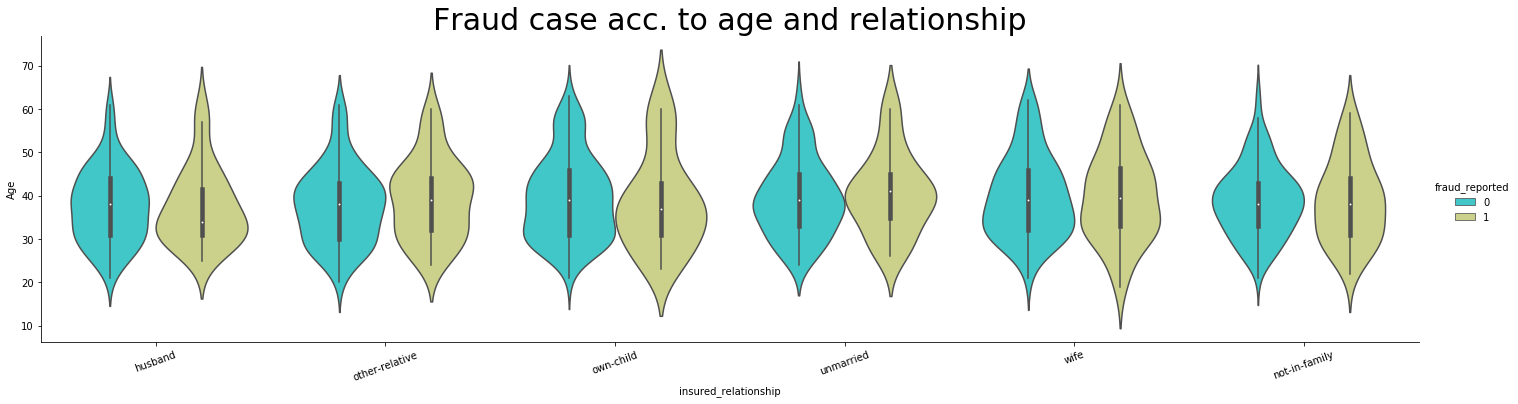

In [94]:
sns.factorplot(x='insured_relationship',y='age',hue='fraud_reported',data=df,kind='violin',size=5,palette='rainbow',aspect=4)
plt.title('Fraud case acc. to age and relationship',fontsize=30)
plt.xticks(rotation=20)
plt.ylabel('Age')
plt.show()

# Checking the skewness

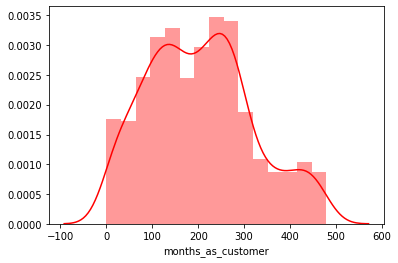

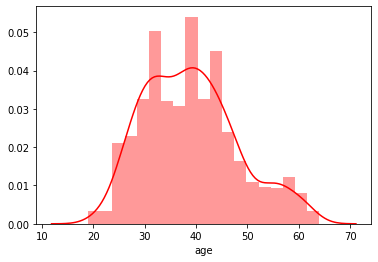

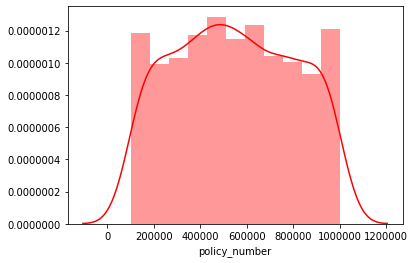

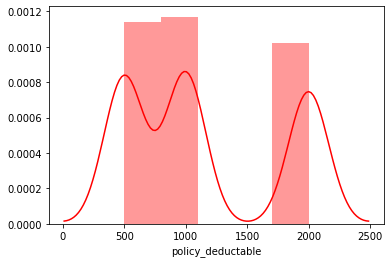

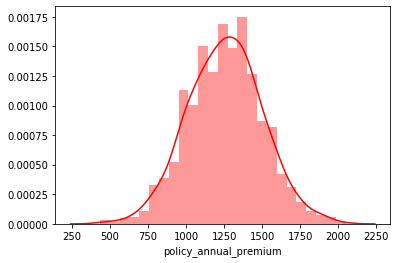

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

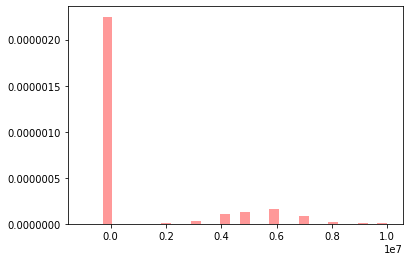

In [95]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [96]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

In [100]:
# Removing skewness via log method
df['insured_zip']=np.log(df['insured_zip'])

In [101]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.779503
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

# Converting categorical data into numeric variables.

In [102]:
# Transforming non-numeric columns into nueric ones.

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [103]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,2.568959,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,2.569294,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,2.562871,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,2.589126,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,2.589445,...,1,0,81,70,36,66,0,31,14,0


# Plotting outliers

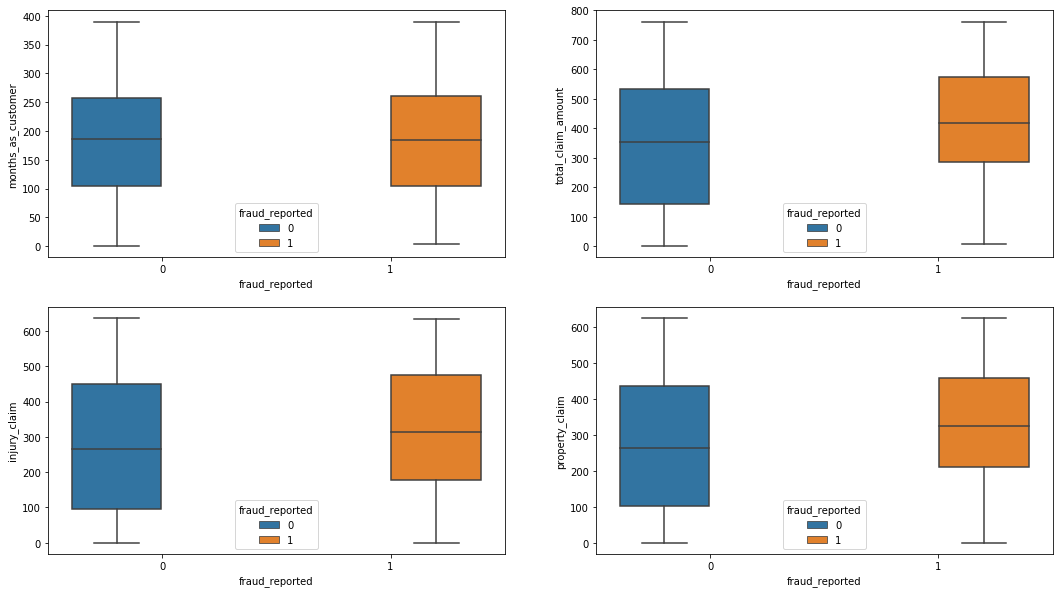

In [104]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(18,10))
sns.boxplot(ax=ax1,x='fraud_reported',y='months_as_customer',hue='fraud_reported',data=df)
sns.boxplot(ax=ax2,x='fraud_reported',y='total_claim_amount',hue='fraud_reported',data=df)
sns.boxplot(ax=ax3,x='fraud_reported',y='injury_claim',hue='fraud_reported',data=df)
sns.boxplot(ax=ax4,x='fraud_reported',y='property_claim',hue='fraud_reported',data=df)

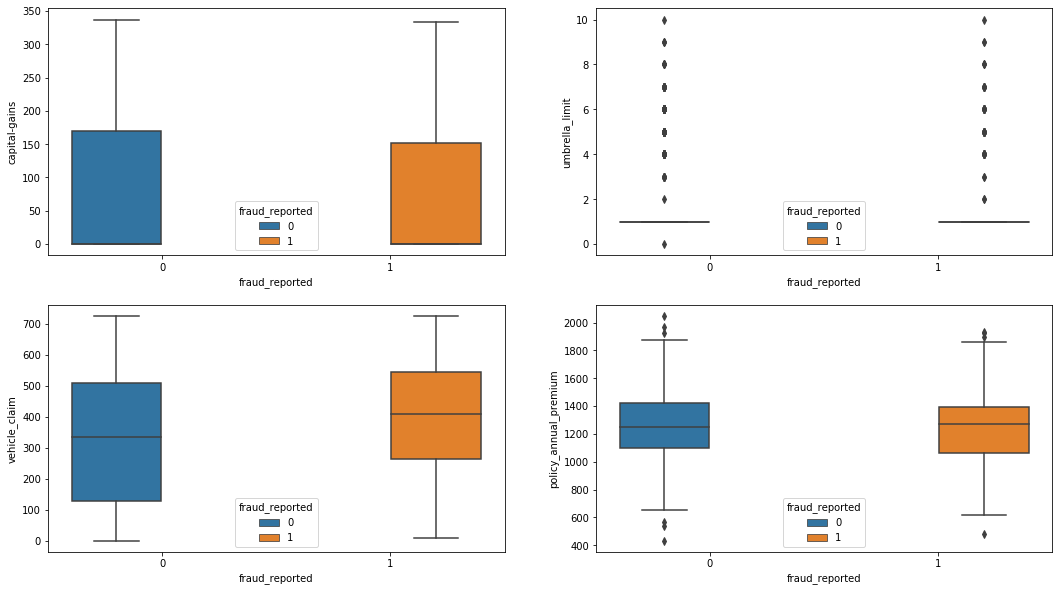

In [107]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(18,10))
sns.boxplot(ax=ax1,x='fraud_reported',y='capital-gains',hue='fraud_reported',data=df)
sns.boxplot(ax=ax2,x='fraud_reported',y='umbrella_limit',hue='fraud_reported',data=df)
sns.boxplot(ax=ax3,x='fraud_reported',y='vehicle_claim',hue='fraud_reported',data=df)
sns.boxplot(ax=ax4,x='fraud_reported',y='policy_annual_premium',hue='fraud_reported',data=df)

From the above graph it is clearly shown that there are some outliers present in the dataset which needs to be removed.

# Removing Outliers

In [108]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094e+00, 9.90836469e-01, 6.75500153e-02, ...,
        1.64574255e+00, 1.83440399e-01, 1.74601919e+00],
       [2.77600296e-01, 3.34073454e-01, 8.40045062e-01, ...,
        6.57470466e-01, 3.15490877e-01, 1.74601919e+00],
       [6.13781395e-01, 1.08891308e+00, 5.97557827e-01, ...,
        9.59702038e-01, 3.15490877e-01, 5.72731393e-01],
       ...,
       [6.53843494e-01, 5.41610567e-01, 1.39430160e+00, ...,
        2.85700476e-02, 1.51392380e+00, 5.72731393e-01],
       [1.93016186e+00, 2.52328351e+00, 1.73205167e-03, ...,
        1.28637088e+00, 1.18130295e+00, 5.72731393e-01],
       [1.92014633e+00, 2.30436250e+00, 8.14064287e-02, ...,
        6.57470466e-01, 3.15490877e-01, 5.72731393e-01]])

In [110]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 875, 922, 975], dtype=int64), array([8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8], dtype=int64))


In [111]:
df_new=df[(z<3).all(axis=1)]

In [112]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(1000, 39) 		 (982, 39)


In [113]:
df=df_new
df.shape

(982, 39)

# Model Training

In [114]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,2.568959,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,2.569294,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,2.562871,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,2.589126,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,2.589445,...,1,0,81,70,36,66,0,31,14,0


In [115]:
# Splitting the data into input and output variable.
x=df.drop(columns=['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,480,532,2,1,1,1406.91,1,2.568959,...,1,2,1,563,258,512,545,10,1,9
1,212,23,257,821,1,1,2,1197.22,5,2.569294,...,0,0,0,44,46,45,38,8,12,12
2,123,10,672,186,2,0,2,1413.14,5,2.562871,...,2,3,0,143,337,104,116,4,30,12
3,239,22,140,766,0,1,2,1415.74,6,2.589126,...,1,2,0,451,245,249,521,3,34,19
4,212,25,286,181,0,2,1,1583.91,6,2.589445,...,0,1,0,81,70,36,66,0,31,14


In [116]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [117]:
# Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(982, 38) 		 (982,)


In [119]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [121]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42,stratify=y)

In [122]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(785, 38) 		 (197, 38)


In [123]:
#checking the shape
print(y_train.shape,'\t',y_test.shape)

(785,) 	 (197,)


In [125]:
# Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [126]:
# All algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.7817258883248731
[[138  11]
 [ 32  16]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       149
           1       0.59      0.33      0.43        48

    accuracy                           0.78       197
   macro avg       0.70      0.63      0.65       197
weighted avg       0.76      0.78      0.76       197

************************************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.751269035532995
[[121  28]
 [ 21  27]]
              precision    recall  f1-score   support

           0       0.85      0.81

In [127]:
# Cross validate the models

models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.75757576 0.75757576 0.8030303  0.74242424 0.77272727 0.81818182
 0.78787879 0.69230769 0.75384615 0.73846154 0.76923077 0.83076923
 0.8        0.75384615 0.78461538]
Mean Score: 0.770831390831391
Standard deviation: 0.03382121499150532
************************************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.77272727 0.77272727 0.8030303  0.66666667 0.77272727 0.66666667
 0.71212121 0.72307692 0.72307692 0.69230769 0.72307692 0.84615385
 0.76923077 0.72307692 0.73846154]
Mean Score: 0.7403418803418804
Standard deviation: 0.047793049360333247
**********************************

# Using GridSearchCV to find out best parameters

In [129]:
# Using GridSearchCV to find out the best parameter in Logistic Regression.

parameters={'C':[1,10],'random_state':range(42,56)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [131]:
# Using GridSearchCV to find out the best parameter in DecisionTreesClassifier.
parameters={'criterion':['gini','entropy'],'random_state':range(42,60)}
dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 56}


In [132]:
# Using GridSearchCV to find out the best parameter in GradientBoostingClassifier.
parameters={'criterion':['friedman_mse','mse','mae'],'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


# Applying the parameters in models

In [133]:
LR=LogisticRegression(C=10,random_state=42)
DTC=DecisionTreeClassifier(criterion='entropy',random_state=56)
GBC=GradientBoostingClassifier(criterion='friedman_mse',random_state=42,learning_rate=0.001,n_estimators=100,max_depth=4)
BC=BaggingClassifier(n_estimators=250)

In [134]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisonTreeClassifier',DTC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('BaggingClassifier',BC))

***************** LogisticRegression *********************


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.7817258883248731


Cross Val Score: 0.7698212898212898


ROC_AUC_Score: 0.6297539149888143


[[138  11]
 [ 32  16]]


Classification_report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       149
           1       0.59      0.33      0.43        48

    accuracy                           0.78       197
   macro avg       0.70      0.63      0.65       197
weighted avg       0.76      0.78      0.76       197



AxesSubplot(0.125,0.808774;0.775x0.0712264)



***************** DecisonTreeClassifier *********************


DecisionTreeCl

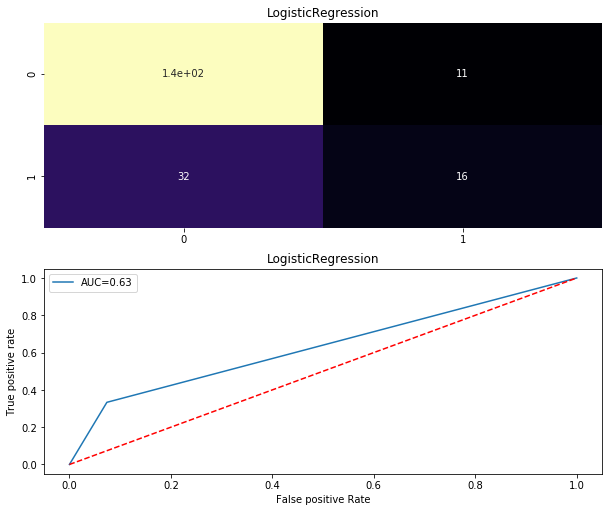

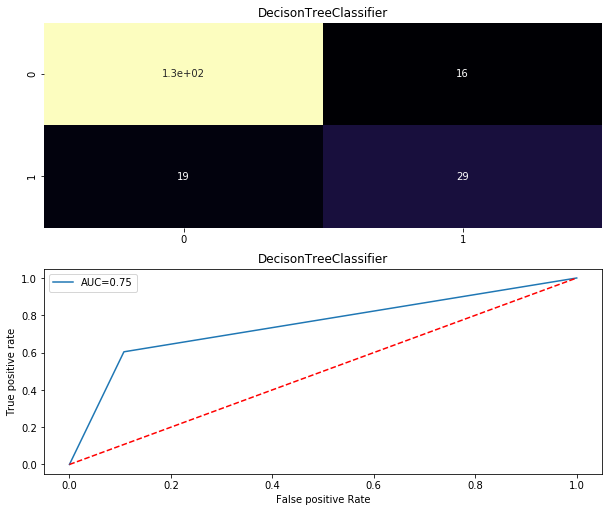

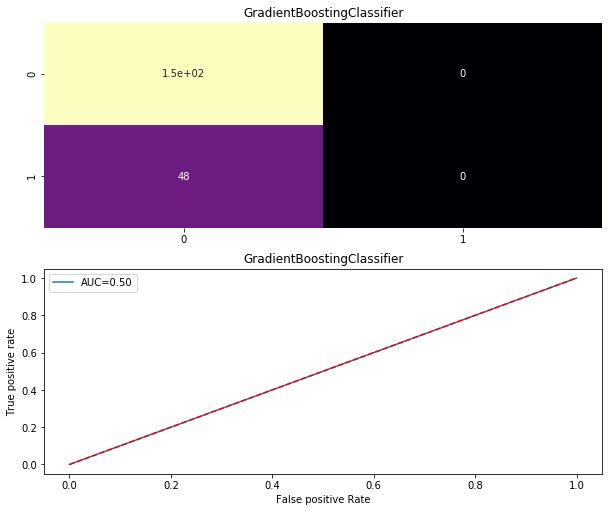

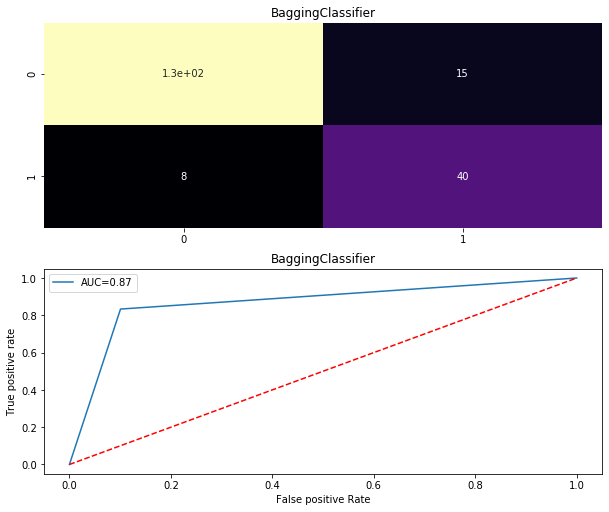

In [135]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('*****************',name,'*********************')
    print('\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_Score:',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print('Classification_report \n',classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix via Heatmap
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='magma'))
    plt.subplot(912)
    plt.title(name)
    
    # Plotting ROC Curve
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive Rate')
    print('\n\n')

In [136]:
# Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_Score':CVS,'ROC_AUC_Score':ROC_Score})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,LogisticRegression,78.172589,76.982129,62.975391
1,DecisonTreeClassifier,82.233503,77.706294,74.839206
2,GradientBoostingClassifier,75.634518,75.558664,50.000000
3,BaggingClassifier,88.324873,83.512044,86.633110


# I choose BaggingClassifier as my final model

In [137]:
# Saving the model
from sklearn.externals import joblib

#Saving the model as an object in a file
joblib.dump(BC,'Auto_Insurance_Fraud_BC.obj')

['Auto_Insurance_Fraud_BC.obj']